In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = open('../data/facie_cube').read().splitlines()[5:]
data  = pd.DataFrame([x.split(sep= ' ') for x in data ]).drop(columns= 3).astype(float)
data.columns = ['i','j','k','f']
data

,i,j,k,f
0,1.0,25.0,1.0,0.0
1,1.0,25.0,2.0,0.0
2,1.0,25.0,3.0,1.0
3,1.0,25.0,4.0,0.0
4,1.0,25.0,5.0,0.0
...,...,...,...,...
178195,139.0,38.0,32.0,3.0
178196,139.0,38.0,33.0,2.0
178197,139.0,38.0,34.0,2.0
178198,139.0,38.0,35.0,2.0


## Фильтрация датасета по k-ому слою.


In [3]:
matrix_data_list = []
for i in range(len(data.k.unique())):  
    data_filtered = data[data['k'] == i + 1]
    matrix_data = pd.pivot_table(data_filtered,  index='i',columns='j', values='f') 
    matrix_data_list.append(matrix_data)
matrix_data_list

[j      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  ...  39.0  \
 i                                                                  ...         
 1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 2.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 3.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 4.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 5.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   0.0   
 ...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
 135.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   
 136.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   
 137.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   
 138.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   0.0   
 139.0   NaN   NaN   NaN   N

## Вычисление вероятности появления события 

In [95]:
df = pd.DataFrame(np.unique(matrix_data_list[0].values, return_counts=True))
df.columns = df.iloc[0, :].values
df = df.drop(0)
df

,0.0,1.0,NaN
1,3053.0,1897.0,1722.0


In [96]:
slices = pd.DataFrame(
    index = range(1,len(data.k.unique()) + 1), 
    columns = [0, 1, 2, 3, 4, None]
)
slices.head()

,0.0,1.0,2.0,3.0,4.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
for k in range(1, len(matrix_data_list) + 1):
    df = pd.DataFrame(np.unique(matrix_data_list[k-1].values, return_counts=True))

    for i in range(df.shape[1]):
        value = df.iloc[0, i]
        count = int(df.iloc[1, i])
        
        slices.loc[k, value] = count        
slices

,0.0,1.0,2.0,3.0,4.0,NaN
1,3053,1897,NaN,NaN,NaN,1722
2,3034,1916,NaN,NaN,NaN,1722
3,3371,1579,NaN,NaN,NaN,1722
4,2832,2118,NaN,NaN,NaN,1722
5,2956,1994,NaN,NaN,NaN,1722
6,3131,1819,NaN,NaN,NaN,1722
7,2925,2025,NaN,NaN,NaN,1722
8,2482,2468,NaN,NaN,NaN,1722
9,NaN,NaN,4319,NaN,631,1722
10,NaN,NaN,4613,NaN,337,1722


In [98]:
slices['all'] = slices.sum(axis=1)
slices['P0'] = slices[0.0]/slices['all']
slices['P1'] = slices[1.0]/slices['all']
slices['P2'] = slices[2.0]/slices['all']
slices['P3'] = slices[3.0]/slices['all']
slices['P4'] = slices[4.0]/slices['all']

In [99]:
slices.iloc[:, 7:]

,P0,P1,P2,P3,P4
1,0.457584,0.284323,NaN,NaN,NaN
2,0.454736,0.28717,NaN,NaN,NaN
3,0.505246,0.236661,NaN,NaN,NaN
4,0.42446,0.317446,NaN,NaN,NaN
5,0.443046,0.298861,NaN,NaN,NaN
6,0.469275,0.272632,NaN,NaN,NaN
7,0.438399,0.303507,NaN,NaN,NaN
8,0.372002,0.369904,NaN,NaN,NaN
9,NaN,NaN,0.647332,NaN,0.094574
10,NaN,NaN,0.691397,NaN,0.05051


In [100]:
matrix_probability_list = []
for i,ss  in enumerate(matrix_data_list):
    ss = ss.replace(to_replace = 0, value = slices['P0'][i+1])
    ss = ss.replace(to_replace = 1, value = slices['P1'][i+1])
    ss = ss.replace(to_replace = 2, value = slices['P2'][i+1])
    ss = ss.replace(to_replace = 3, value = slices['P3'][i+1])
    ss = ss.replace(to_replace = 4, value = slices['P4'][i+1])
    matrix_probability_list.append(ss)

In [101]:
unique_j = len(data.j.unique())
unique_i = len(data.i.unique())

In [102]:
final_matrix = []
for i in range(unique_j):
    for j in range(unique_i):
        final_matrix.append([])
len(final_matrix)

6672

In [104]:
for i,ss in enumerate(matrix_probability_list):
    for j in range(unique_i):
        for k in range(unique_j):
            final_matrix[j * unique_j + k].append(ss.iloc[j,k])

<AxesSubplot:>

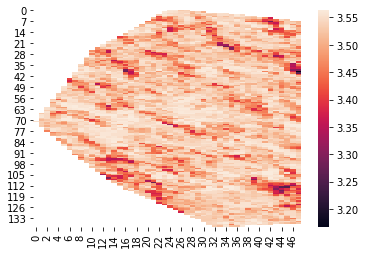

In [105]:
entr = []
for i in final_matrix:
    ent = entropy(i)
    entr.append(ent)
    
    
entr = np.array(entr)
entr_2d = entr.reshape((unique_i, unique_j),order='C')
entry_df = pd.DataFrame(entr_2d)
sns.heatmap(entry_df) 
plt.gca()